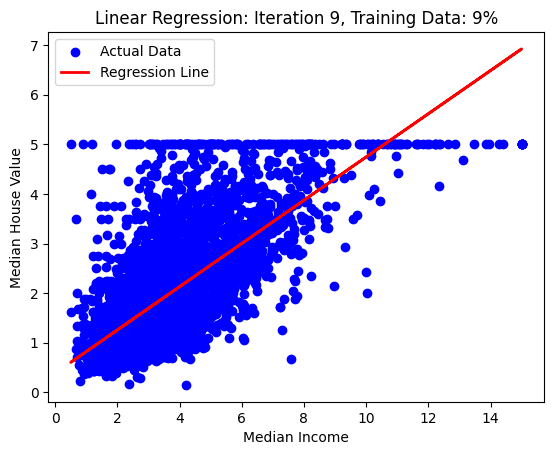

Mean Squared Error: 0.71


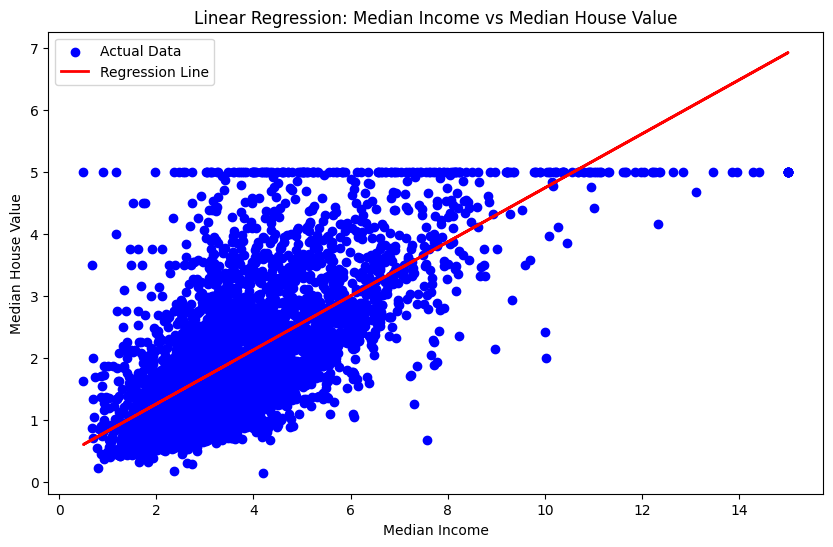

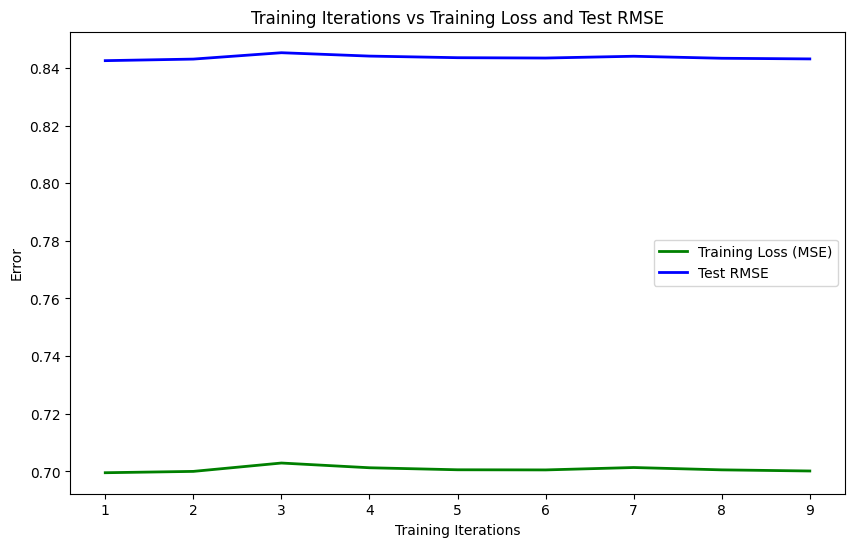

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from IPython.display import clear_output
import time  # Import thư viện time


# Step 1: Load the dataset
california = fetch_california_housing()

# Convert to a Pandas DataFrame for easier data handling
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Target'] = california.target

# View the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Step 2: Select features and target variable
# In this case, we'll use the 'MedInc' (median income) feature to predict 'Target' (median house value).
X = data[['MedInc']]
y = data['Target']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Linear Regression model
model = LinearRegression()

# Step 5: Train the model with the training data
training_losses = []
test_rmses = []
iterations = range(1, 10)
for i in iterations:
    # Fit the model using a subset of the training data
    model.fit(X_train[:i * len(X_train) // 100], y_train[:i * len(y_train) // 100])
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    loss = mean_squared_error(y_train, y_train_pred)
    training_losses.append(loss)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_rmses.append(test_rmse)

    clear_output(wait=True)  # Xóa đồ thị cũ
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.title(f'Linear Regression: Iteration {i}, Training Data: {i}%')
    plt.legend()
    plt.show()
    time.sleep(1.5)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Median Income vs Median House Value')
plt.legend()
plt.show()

# Step 9: Plot training iterations vs training loss and test RMSE
plt.figure(figsize=(10, 6))
plt.plot(iterations, training_losses, color='green', linewidth=2, label='Training Loss (MSE)')
plt.plot(iterations, test_rmses, color='blue', linewidth=2, label='Test RMSE')
plt.xlabel('Training Iterations')
plt.ylabel('Error')
plt.title('Training Iterations vs Training Loss and Test RMSE')
plt.legend()
plt.show()


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('Student_Performance.csv')

# Explore dataset
print("Dataset shape:", data.shape)
print("Sample data:")
print(data.head())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Handle categorical data
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Separate features and target variable
# Replace 'performance' with the actual column name of student performance score in your dataset
X = data.drop('Performance Index', axis=1)  # Update 'performance' to match your target column name
y = data['Performance Index']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Dataset shape: (10000, 6)
Sample data:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Missing values: Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours               